In [29]:
%load_ext nb_black
%reload_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.core.display import HTML

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

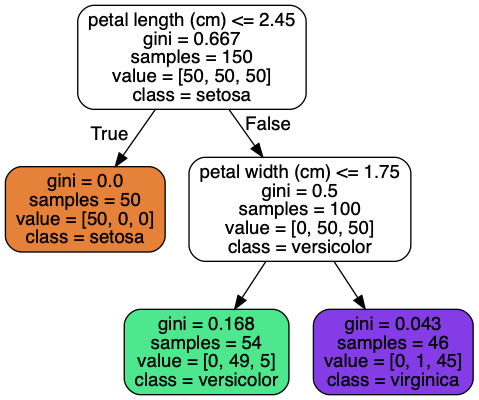

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
Image(filename="iris_tree.png")

In [42]:
# gini - Gini impurity - a measure of how many training examples that
# a leaf applies to belong to 1 class. It is 1 if all training examples that a leaf applies
# belong to 1 class - e.g. the left orange leaf.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
# FIXME - Plot decision tree boundary

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# Decision trees can output prediction probabilities for each class
tree_clf.predict_proba([[2, 1.5]]), tree_clf.predict_proba(
    [[2.46, 1.5]]
), tree_clf.predict_proba([[2.46, 1.8]]), tree_clf.predict_proba([[2.46, 20]])

# What's interesting that 3rd and 4th input output probabilities are the same
# although petal width is much bigger. Actually, estimated probabilities
# will be identical for any feature value combination that lies in the bottom-right quadrant
# Interesting...

(array([[0.        , 0.90740741, 0.09259259]]),
 array([[0.        , 0.90740741, 0.09259259]]),
 array([[0.        , 0.02173913, 0.97826087]]),
 array([[0.        , 0.02173913, 0.97826087]]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>